In [35]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
titanic.shape

(891, 15)

In [55]:
#데이터 내보내기(export)
titanic.to_csv('C:\\Users\\bomul\\OneDrive\\바탕 화면\\23-1\\데사\\중간 대비\\2주차 연습\\titanic.csv', index = False)

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
# age 변수 결측 중앙값으로 채우기
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [41]:
titanic['age'].median()

28.0

In [42]:
# embarked 변수 최빈값 파악
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
# embarked 변수 결측 최빈값 'S'로 채우기
titanic['embarked'] = titanic['embarked'].fillna('S')

In [44]:
# deck 변수 최빈값 파악
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [45]:
# deck 변수 결측 최빈값 'C'로 채우기
titanic['deck'] = titanic['deck'].fillna('C')

In [46]:
# embarked_town 변수 최빈값 파악
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [47]:
# embarked_town 변수 결측 최빈값 'Southampton'으로 채우기
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [48]:
# 결측 대체 확인
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [50]:
# 생존 정보 확인
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [51]:
# 생존률 확인
round(titanic.survived.value_counts()[1]/sum(titanic.survived.value_counts()), 2)

0.38

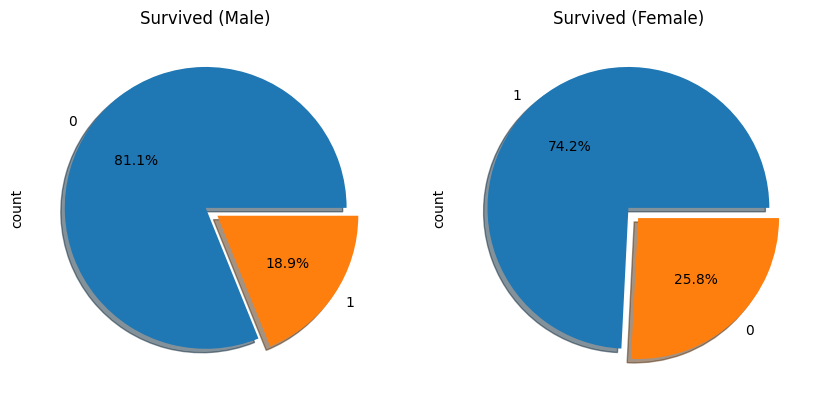

In [52]:
import matplotlib.pyplot as plt

# 차트를 통한 생존 정보 시각적 탐색
# 남성, 여성 각각의 생존율 파이차트
f,ax = plt.subplots(1, 2, figsize = (10,5)) # 1x2 행렬의 차트
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

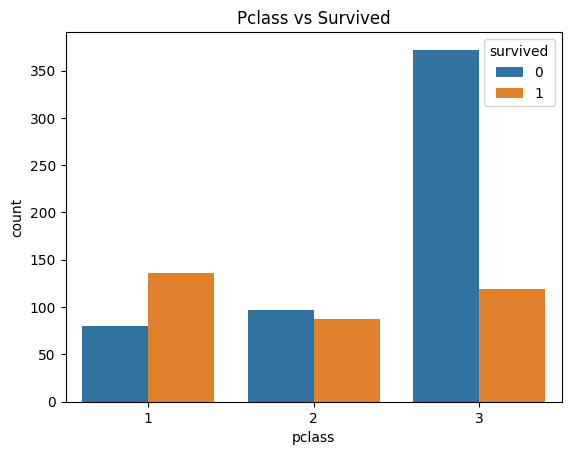

In [53]:
# 객실 등급 별 생존 정보에 대한 막대 그래프
sns.countplot(x='pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

In [58]:
titanic_data = titanic.loc[:, ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']]
titanic_corr = titanic_data.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


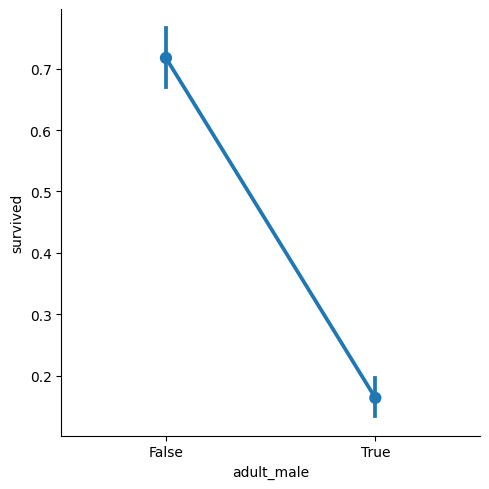

In [59]:
# 생존 상태(survived)와 가장 상관관계가 큰 adult_male 변수 확인
sns.catplot(x = 'adult_male', y = 'survived', data= titanic, kind = 'point')
plt.show()

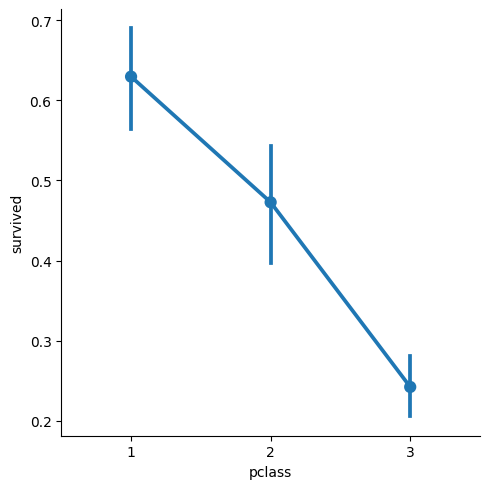

In [60]:
# 두 번째로 생존 상태(survived)와 상관관계가 큰 pclass 변수 확인
sns.catplot(x = 'pclass', y = 'survived', data = titanic, kind = 'point')
plt.show()

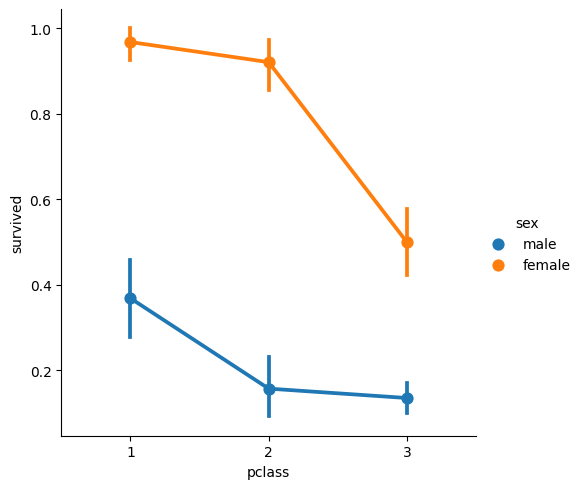

In [61]:
# adult_male이 생존상태(survived)와 상관관계가 컸던 것을 고려해 pclass 변수를 성별(sex)로 구분해 확인
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()